# ResultAnalysis
Notebook to check Grid Search results

In [1]:
import os
from working_dir import set_wd
set_wd()
os.getcwd()

'/Users/tales.pimentel/ds/kaggle/football-match-prediction'

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from src.dao import dao_ml
from src.utils import dflib, stats, pretties, plot, plot_domain, palette

In [3]:
pretties.max_data_frame_columns()

# Loading Results

In [6]:
all_results = dao_ml.load_all_modeling()
print(len(all_results))

pd.DataFrame(all_results)[["id_modeling", "datetime", "clf_name", "pipeline_train_stages", "best_score_cv_train", "best_score_cv"]].sort_values("datetime", ascending=False)

3


,id_modeling,datetime,clf_name,pipeline_train_stages,best_score_cv_train,best_score_cv
2,a26f990a-12e8-4a8d-9e2e-74e4969f6508,2022-05-26 19:02:06,RandomForestClassificationModel,"[VectorAssembler, StringIndexerModel]",0.981899,1.012797
0,d6e238c1-c6a8-41be-ac18-3cad3f47a420,2022-05-26 16:44:32,XGBClassifier,[StringIndexerModel],0.996144,1.010365
1,6d671cab-ea98-4471-8455-0a8092241123,2022-05-26 15:52:32,RandomForestClassificationModel,"[VectorAssembler, StringIndexerModel]",0.982310,1.012607


In [7]:
load_ids_modeling = ["a26f990a-12e8-4a8d-9e2e-74e4969f6508", "d6e238c1-c6a8-41be-ac18-3cad3f47a420"]

rdf = pd.DataFrame()

for id_modeling in load_ids_modeling:
    results_temp = dao_ml.load_modeling(id_modeling)
    
    rdf_id = pd.DataFrame(results_temp["overfitting_analysis_df"])
    rdf_id["clf_name"] = results_temp["clf_name"]
    
    rdf = rdf.append(rdf_id)

In [8]:
rdf = rdf.sort_values("log_loss_cv")
rdf.head(5)

,log_loss_train,log_loss_cv,numTrees,maxDepth,subsamplingRate,clf_name,colsample_bytree,max_depth,n_estimators,subsample,std_train_log_loss,std_cv_log_loss
95,0.996144,1.010365,NaN,NaN,NaN,XGBClassifier,0.7,4.0,40.0,0.8,0.001082,0.004471
89,1.005290,1.010414,NaN,NaN,NaN,XGBClassifier,0.7,2.0,60.0,0.8,0.000970,0.004523
88,1.005359,1.010438,NaN,NaN,NaN,XGBClassifier,0.7,2.0,60.0,0.7,0.000975,0.004662
87,1.005409,1.010486,NaN,NaN,NaN,XGBClassifier,0.7,2.0,60.0,0.6,0.000884,0.004605
92,1.002289,1.010504,NaN,NaN,NaN,XGBClassifier,0.7,4.0,20.0,0.8,0.000977,0.004550


In [9]:
def overfitting_analysis_num(metrics_df, param_name, metric_colname):
    metric_colname_train = metric_colname + "_train"
    metric_colname_valid = metric_colname + "_cv"
    
    of_data = metrics_df.groupby(param_name)[[metric_colname_train, metric_colname_valid]].mean().reset_index()

    display(of_data)
    
    title = f"{metric_colname} mean values for {param_name}"
    
    plt.figure(figsize=(8,5))
    plt.scatter(of_data[param_name], of_data[metric_colname_train], label="train", s=130, alpha=0.6)
    plt.scatter(of_data[param_name], of_data[metric_colname_valid], label="cv", s=130, alpha=0.6)
    plt.title(label=title)
    plt.xlabel(param_name)
    plt.ylabel(metric_colname)
    plt.legend()
    plt.show()

# <font color=blue>RandomForestClassificationModel</font>

#### <font color=black>subsamplingRate</font>

,subsamplingRate,log_loss_train,log_loss_cv
0,0.5,1.008337,1.018983
1,0.6,1.008379,1.019187
2,0.7,1.008328,1.019194


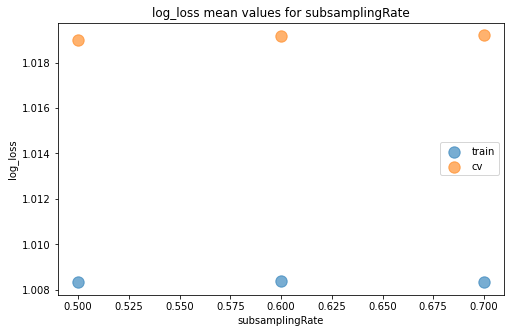

#### <font color=black>maxDepth</font>

,maxDepth,log_loss_train,log_loss_cv
0,4.0,1.029342,1.029975
1,6.0,1.016921,1.019245
2,8.0,1.004489,1.014112
3,10.0,0.982639,1.013154


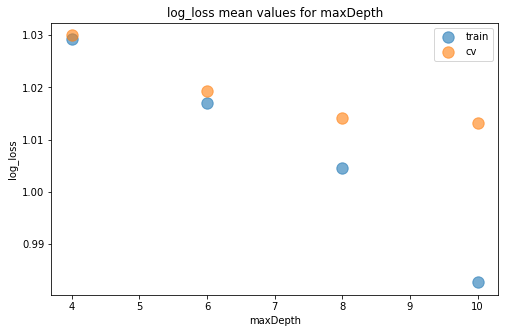

#### <font color=black>numTrees</font>

,numTrees,log_loss_train,log_loss_cv
0,40.0,1.008504,1.019301
1,60.0,1.008191,1.018942


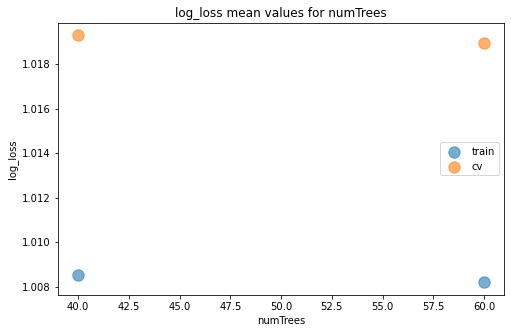

In [10]:
pretties.md("RandomForestClassificationModel", size="#", color="blue")
rfc_df = rdf[rdf["clf_name"] == "RandomForestClassificationModel"]

for param_name in ["subsamplingRate", "maxDepth", "numTrees"]:
    pretties.md(param_name, size="####")
    overfitting_analysis_num(metrics_df=rfc_df, 
                             param_name=param_name, 
                             metric_colname="log_loss")

# <font color=blue>XGBClassifier</font>

#### <font color=black>colsample_bytree</font>

,colsample_bytree,log_loss_train,log_loss_cv
0,0.5,0.998320,1.013066
1,0.6,0.998320,1.013066
2,0.7,0.997481,1.012854


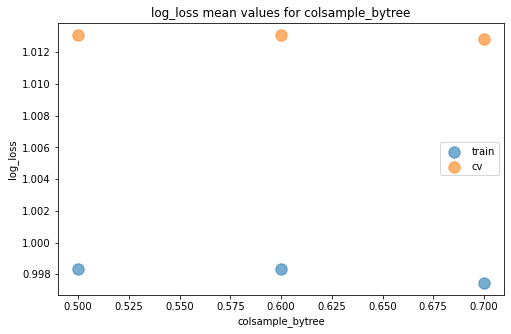

#### <font color=black>max_depth</font>

,max_depth,log_loss_train,log_loss_cv
0,1.0,1.013294,1.015318
1,2.0,1.007862,1.011722
2,4.0,0.997253,1.010966
3,6.0,0.973752,1.013976


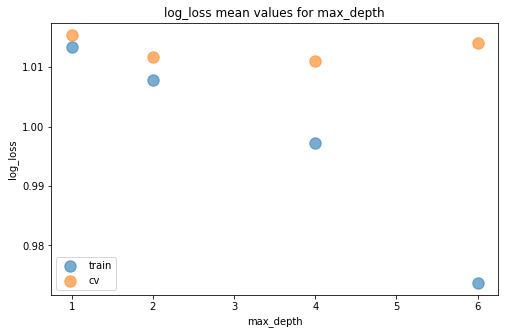

#### <font color=black>n_estimators</font>

,n_estimators,log_loss_train,log_loss_cv
0,20.0,1.004815,1.013994
1,40.0,0.997312,1.012425
2,60.0,0.991995,1.012568


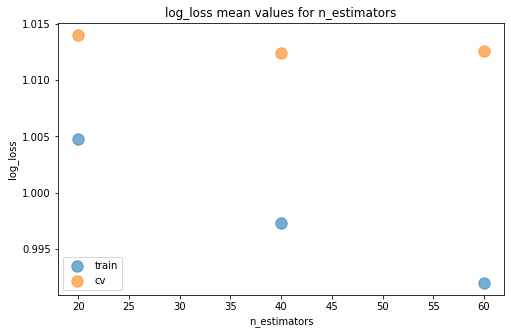

#### <font color=black>subsample</font>

,subsample,log_loss_train,log_loss_cv
0,0.6,0.998279,1.013127
1,0.7,0.998022,1.013073
2,0.8,0.997821,1.012786


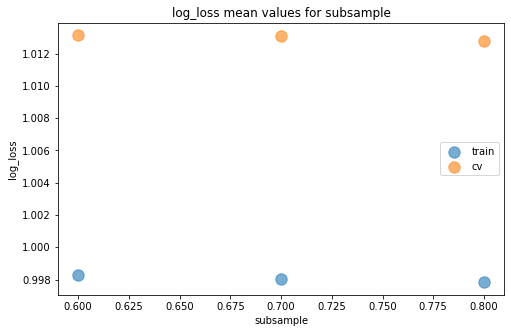

In [11]:
pretties.md("XGBClassifier", size="#", color="blue")
xgbc_df = rdf[rdf["clf_name"] == "XGBClassifier"]

for param_name in ["colsample_bytree", "max_depth", "n_estimators", "subsample"]:
    pretties.md(param_name, size="####")
    overfitting_analysis_num(metrics_df=xgbc_df, 
                             param_name=param_name, 
                             metric_colname="log_loss")